# Text Clustering

### In general, we have two main groups of machine learning techniques that are supervised and unsupervised methods. The supervised models, work based on the tagged target value or label where you as the designer should predefine some responses to a number of given examples to the machine. You should define if this task is good or bad, or if the example is in category 1 or 2 and so on. At the other hand, unsupervised methods do not need labling which sometimes could be very costly. In unsupervised methods, you actually feed the machine with un-labeled examples and machine tries to separate them into group for further analysis.
### For the text clustering, we have seen methods in the class such as topic modeling which uses the own word of text to define different clusters. Here, I like to introduce a very famous clustering method called K-means. At the end, we will compare the results of topic molideing (LDA) with K-means.

### Introduction to K-means

In [3]:
# In Kmeans, we first need to input the number of clusters we are expecting to explore. 
# Then, the algorithm selects the first set of data given as clusters centers.
# In the next step, method finds points that are close to centroids (central of clusters)
# Then, a new centroid is defined for each cluster. 
# The method tries to assign points to clusters as the distance of them to clusters centroids match. 
# Means, when a point has less distance to a centroid, it should be clustered in that cluster.
# The process repeats untill the convergence where the points are correctly assigned to clusters based on the distance defined.
# We can define several distances into the method where Euclidean is the most famous one. 
# SKlearn package implements K-means and here, we use the package. Let's see the example.

Here, I start with a very simple example.
The idea is to separate the group of text using Kmean method which is one of the famous methods in unsupervised methods.
We use Sklearn package to implement kmeans. Kmean algorithm works with numbers and therefore, we need to transform text to digits
Here we use TFIDF which is familiar and one of the major methods.

In [4]:
# First we need to import some packages
# Packages needed to Vectorize the text (text to digit)
from sklearn.feature_extraction.text import TfidfVectorizer

# Packages for K-means
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

#packages for text preparation and cleaning
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist, word_tokenize
from string import digits
import re
from nltk.stem.wordnet import WordNetLemmatizer

#Packages to use with dataframes and calculations
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

# Packages to crawl the internet to acquire some data
import requests
from lxml import html

# Packages for topic modeling (LDA)
import gensim
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim import corpora

C:\ProgramData\Anaconda2\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
# This is a very simple example
text = ["bank river shore water",
        "river water flow fast tree",
        "bank water fall flow",
        "bank bank water rain river",
        "river water mud tree",
        "money transaction bank finance",
        "bank borrow money", 
        "bank finance",
        "finance money sell bank",
        "borrow sell', 'finance",
        "bank loan sell"]

In [6]:
# Transfering text to digits
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text)

In [7]:
# For k-mean we have to predefine number of clusters. Here, we define 2 clusters
ClusterNum = 2

In [8]:
# Generating the clustering model
model = KMeans(n_clusters=ClusterNum, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
# A code to see the words of each cluster
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(ClusterNum):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:  water  river  bank  flow  tree  loan  shore  fall  mud  rain
Cluster 1:  finance  money  bank  borrow  sell  transaction  water  tree  shore  river


In [10]:
# Lets do some prediction

In [11]:
Y = vectorizer.transform(["I have deposited money into my bank."])
prediction = model.predict(Y)
print "The cluster of this sentence is predicted to be: %s" %(prediction)

The cluster of this sentence is predicted to be: [1]


In [12]:
Y = vectorizer.transform(["I enjoy drinking tea at the side of the river."])
prediction = model.predict(Y)
print "The cluster of this sentence is predicted to be: %s" %(prediction)

The cluster of this sentence is predicted to be: [0]


In [13]:
# The model predicted two samples correctly.

This model which is very simple, works based on the given example. So, if we give it more examples, the model could do much more. 
Now, lets cluster much bigger data. I like to collect comments people left for 4 different hot newly released cellphones as Iphone X, Iphone 8, Galaxy Note 8 , and LG V30. The comments are left on each phone's pages in http:\\www.gsmarena.com. Then, I like to collect human recourse news from hrmonline.ca. I like to use K-mean algorithm to cluster them and see the effectiveness of the model. 
in K-mean, we have to predefine how many clusters are we looking for. So, since we have 2 categories, here we look for 2 clusters. 

In [35]:
# Comments for cellphones
# Lets begin with collecting comments from Iphone X page.
a = "http://www.gsmarena.com/apple_iphone_x-reviews-8858p" # defining the list of html pages we like to crawl
b=".php"
text = []

for i in range(1,15): # In 15 pages, we like to collect comments.
    url = '%s%s%s' %(a,i,b)
    data = html.fromstring(requests.get(url).text)
    commentIPX = data.xpath("///div[@class='user-thread']/p/text()") #Acquiring the comment
    commentIPX = [i.replace("\r\n", "") for i in commentIPX] #Cleaning
    commentIPX = [i.replace('\'', "") for i in commentIPX] #Cleaning
    commentIPX = [ i for i in commentIPX if len(i) >= 3 ] #Dropping short words
    for row in commentIPX: # A loop to attach comments of each page to a large list to collect comments from all 15 pages
        if len (row) >= 20: #Drop comments that has less than 20 charactres
            text.append(row)
# Collecting comments for Iphone 8
a = "http://www.gsmarena.com/apple_iphone_8-reviews-8573p" # defining the list of html pages we like to crawl
b=".php"

for i in range(1,15): # In 15 pages, we like to collect comments.
    url = '%s%s%s' %(a,i,b)
    data = html.fromstring(requests.get(url).text)
    commentIP8 = data.xpath("///div[@class='user-thread']/p/text()") #Acquiring the comment
    commentIP8 = [i.replace("\r\n", "") for i in commentIP8] #Cleaning
    commentIP8 = [i.replace('\'', "") for i in commentIP8] #Cleaning
    commentIP8 = [ i for i in commentIP8 if len(i) >= 3 ] #Dropping short words
    for row in commentIP8: # A loop to attach comments of each page to a large list to collect comments from all 15 pages
        if len (row) >= 20: #Drop comments that has less than 20 charactres
            text.append(row)
        
# Collecting comments for Galaxy Note 8
a = "http://www.gsmarena.com/samsung_galaxy_note8-reviews-8505p" # defining the list of html pages we like to crawl
b=".php"

for i in range(1,15): # In 15 pages, we like to collect comments.
    url = '%s%s%s' %(a,i,b)
    data = html.fromstring(requests.get(url).text)
    commentGN8 = data.xpath("///div[@class='user-thread']/p/text()") #Acquiring the comment
    commentGN8 = [i.replace("\r\n", "") for i in commentGN8] #Cleaning
    commentGN8 = [i.replace('\'', "") for i in commentGN8] #Cleaning
    commentGN8 = [ i for i in commentGN8 if len(i) >= 3 ] #Dropping short words
    for row in commentGN8: # A loop to attach comments of each page to a large list to collect comments from all 15 pages
        if len (row) >= 20: #Drop comments that has less than 20 charactres
            text.append(row)

# Collecting comments for LG V30
a = "http://www.gsmarena.com/lg_v30-reviews-8712p" # defining the list of html pages we like to crawl
b=".php"

for i in range(1,15): # In 15 pages, we like to collect comments.
    url = '%s%s%s' %(a,i,b)
    data = html.fromstring(requests.get(url).text)
    commentLGV30 = data.xpath("///div[@class='user-thread']/p/text()") #Acquiring the comment
    commentLGV30 = [i.replace("\r\n", "") for i in commentLGV30] #Cleaning
    commentLGV30 = [i.replace('\'', "") for i in commentLGV30] #Cleaning
    commentLGV30 = [ i for i in commentLGV30 if len(i) >= 3 ] #Dropping short words
    for row in commentLGV30: # A loop to attach comments of each page to a large list to collect comments from all 15 pages
        if len (row) >= 20: #Drop comments that has less than 20 charactres
            text.append(row)
#Concatinating all comments to a dataframe        
comment=pd.DataFrame(text)

In [38]:
# Saving the comments into csv file for analyzing later
comment.to_csv('comment.csv', index=False, encoding='utf-8')
comment.columns=[0]

In [46]:
#Shuffling the comments
comment= shuffle(comment)

I like to see if the method can cluster the comments of all phones. This is challenging since even a human cannot distinuish the comments into different phones. There are comments, in some pages people talk about display without mentioning the phone! So, I do not expect a clear clustering.

In [40]:
# Converting text to digit with dropping english stopwords
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(comment[0])

In [41]:
# Defining 4 clusters and making the model
ClusterNum = 4
model = KMeans(n_clusters=ClusterNum, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
# Watching the words of each clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(ClusterNum):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:  phone  battery  apple  screen  android  use  samsung  note  dont  lol
Cluster 1:  lg  camera  v30  like  just  good  note  s8  samsung  phone
Cluster 2:  iphone  apple  better  plus  phone  samsung  like  android  im  new
Cluster 3:  mate  10  huawei  note  pro  camera  better  lol  jack  headphone


As expected, it is not a clear clustering. Words like samsung and apple and iphone are in the same clusters where we didn't expect it. 

## Now, lets run topic modeling on the dataset to compare the methods.

In [51]:
# First I need to clean the data
texts=[]
for text in comment['0']:
    text=str(text)
    texts.append(text)
documents = [re.sub("[^a-zA-Z]+", " ", text) for text in texts]
texts = [[word for word in text.lower().split() ] for text in documents]
# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]
# tokenize
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [52]:
# Making a dictionary
dictionary = Dictionary(texts)
## Remove rare and common tokens.
# ignore words that appear in less than 5 documents or more than 80% documents (remove too frequent & infrequent words) - an optional step
dictionary.filter_extremes(no_below=2, no_above=0.4)
corpus = [dictionary.doc2bow(text) for text in texts]

In [53]:
# Making the model
np.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=4, passes=50)

In [54]:
# Result of the model
model.show_topics(num_topics=4)

[(0,
  u'0.015*"camera" + 0.014*"samsung" + 0.013*"mate" + 0.012*"jack" + 0.011*"note" + 0.011*"work" + 0.010*"headphone" + 0.010*"oled" + 0.010*"screen" + 0.010*"scanner"'),
 (1,
  u'0.026*"battery" + 0.021*"phone" + 0.015*"one" + 0.014*"charging" + 0.011*"get" + 0.010*"still" + 0.010*"like" + 0.009*"better" + 0.008*"mah" + 0.008*"look"'),
 (2,
  u'0.073*"iphone" + 0.021*"apple" + 0.018*"phone" + 0.014*"android" + 0.011*"better" + 0.010*"like" + 0.010*"camera" + 0.009*"design" + 0.009*"year" + 0.009*"new"'),
 (3,
  u'0.038*"phone" + 0.028*"note" + 0.012*"samsung" + 0.011*"apple" + 0.010*"screen" + 0.008*"good" + 0.008*"like" + 0.008*"even" + 0.008*"use" + 0.008*"time"')]

In [55]:
# Here I have almost the same result! Not completely separated.

### Now, I like to get data from human resouce news website too. Then, I like to use K-means and LDA to cluster the overall data (phone comments and HR news). By that way, I have larger dataset that could help to empower the model. In addition, My datasets are not very similar like phones comments.

In [67]:
# Read data for HR news from hrmonline.ca and cleaning
# Recording the titles and urls.
finaldata = []
web = "http://www.hrmonline.ca/hr-news/?p=%s"  # The starting url
for page in range(1,35): # going through 35 pages of the website
    url = web % page
    data = html.fromstring(requests.get(url).text) # Acquiring the content of the page
    title = data.xpath("//ul[@class='basic_list']/li/a/text()") # Getting the titles of the news
    title = [i.replace("\r\n", "") for i in title] 
    title = [i.replace("                                        ", "") for i in title] # Cleaning
    title = [i.replace("                                ", "") for i in title] # Cleaning
    title = [i.replace("    ", "") for i in title] # Cleaning
    title = [i.encode("utf-8") for i in title] # Cleaning
    title = [i.replace("\xe2\x80\x99", "") for i in title] # Cleaning
    urlt=data.xpath("//ul[@class='basic_list']/li/a/@href") # Getting the url
    urlt=["http://www.hrmonline.ca"+i for i in urlt] # Correcting the url
    titleurl=zip(title, urlt) # Merging title and url together
    for row in titleurl: # Concatinating all titles and urls together
        finaldata.append(row)
df = pd.DataFrame(finaldata) # Making datagrame 
df = df.rename(columns={0: 'title', 1: 'url'}) # Renaming the columns
df=df.drop_duplicates() # Dropping the possible duplications
len(df) # Checking the number of titles and urls

349

Here, I collect news from each url collected in the previous cell.

In [68]:
finaltext = [] # Defining an empy list
urls = df['url'].tolist()
for url in urls: # Starting the crawling on each url in the list
    r = requests.get(url) # Requesting the url
    data = html.fromstring(r.text) # Grabbing the data
    for i in data.xpath("//main[@class='main_content']"): # Acquiring the news 
        if i.xpath("article[@class='column-sm-9 article']"): # Differentiating between types of news
            news = data.xpath("//div[@class='article_body']/text()")
        elif i.xpath("article[@class='article industry_article']"):
            news = data.xpath("//div[@class='article_body']/p/text()")
        news = [i.replace("\r\n", "") for i in news] #Cleaning
        news = [i.encode("utf-8") for i in news] #Cleaning
        news = [i.replace("\xc2\xa0", "") for i in news] #Cleaning
        news = [i.replace('["', "") for i in news] #Cleaning
        news = [i.replace('"', "") for i in news] #Cleaning
        text=str([i for i in news])
        text=text.replace('["', "") #Cleaning
        text=text.replace("\'", "") #Cleaning
        text=text.replace('"]', "") #Cleaning
        text=text.replace('\\', "") #Cleaning
        text=text.replace('xe2', "") #Cleaning
        text=text.replace('x80', "") #Cleaning
        text=text.replace('x99', "") #Cleaning
        text=text.replace('x9', "") #Cleaning
        text=text.replace('                        ,                                                ', "") #Cleaning
        text=text.replace(', , , ,                         ,                     ',"") #Cleaning
        text=text.replace('d, , , , , ', "") #Cleaning
        text=text.replace(" , c", "") #Cleaning
        text=text.replace(" , ", "") #Cleaning
        text=text.replace("[", "") #Cleaning
        text=text.replace("]", "") #Cleaning
        text=text.replace('                       "                                               ', "") #Cleaning
        text=text.replace(" Want the latest HR news direct to your inbox?, ., ", "") #Cleaning
        text=text.replace(",, ", "") #Cleaning
        text=text.replace(",,,", "") #Cleaning
        text=text.replace(",,,, ", "") #Cleaning
        text=text.replace(", .,", "") #Cleaning
        text=text.replace(".,", ". ") #Cleaning
        text=text.replace(".d", ".") #Cleaning
        text = text.translate(None, digits) #Removing digits
        if len(text)>100:                   # Removing news that has less than 100 chars
            finaltext.append(text)
pd.set_option('display.max_colwidth', -1) # To force pandas to show all data in the dataframe
dft = pd.DataFrame(finaltext) # Making dataframe of the news
dft.to_csv('dft.csv', index=False) # Saving the datafrane for laetr use

In [70]:
# Concatinating the comments for the phones and HR news into one dataframe
alltext=pd.concat([comment, dft], axis=0)
alltext= shuffle(alltext) # Shuffling the rows to randomize the data
alltext.to_csv('alltext.csv', index=False) # Saving the dataframe for later use.

In [88]:
# Converting text to digits
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(alltext[0])

In [89]:
# Defining the number of clusters and making the K-means model
ClusterNum = 2
model = KMeans(n_clusters=ClusterNum, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [90]:
# Printing words from each cluster
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(ClusterNum):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:  iphone  phone  note  apple  just  samsung  battery  like  said  lg
Cluster 1:  jack  headphone  5mm  samsung  sooner  join  10  mate  party  needs


In [74]:
### Here, we see that K-means does not care about news at all! It just looks into phones comments.

In [96]:
# So, we repeat the process for the overall data to start the topic modeling (LDA) model.
texts=[]
for text in alltext[0]:
    text=str(text)
    texts.append(text)
documents = [re.sub("[^a-zA-Z]+", " ", text) for text in texts]
texts = [[word for word in text.lower().split() ] for text in documents]
# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]
# tokenize
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [76]:
dictionary = Dictionary(texts)
## Remove rare and common tokens.
# ignore words that appear in less than 5 documents or more than 80% documents (remove too frequent & infrequent words) - an optional step
dictionary.filter_extremes(no_below=2, no_above=0.4)
corpus = [dictionary.doc2bow(text) for text in texts]

In [77]:
# Making LDA model
np.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=2, passes=50)

In [78]:
# Result of the model
model.show_topics(num_topics=4)

[(0,
  u'0.021*"phone" + 0.021*"iphone" + 0.010*"note" + 0.010*"apple" + 0.008*"samsung" + 0.008*"like" + 0.007*"one" + 0.007*"screen" + 0.006*"camera" + 0.006*"even"'),
 (1,
  u'0.016*"said" + 0.013*"employee" + 0.007*"company" + 0.007*"work" + 0.006*"say" + 0.006*"people" + 0.006*"employer" + 0.006*"also" + 0.005*"one" + 0.005*"time"')]

## Here, we can obviously see that clustering of LDA method is much better and stronger. That's probably because the method is especially for text analyzing. 

In [ ]:
# Show amount of the time takes!

## Appendix

### Now, I like to just show another clustering method called ward hierarchical method in the package of SKlearn.
### I apply it on the data from the phone comments.

In [43]:
# Importing packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

In [ ]:
# Converting text to digits
tfidf_matrix = vectorizer.fit_transform(comment[0])

In [14]:
# Making a distance measurement based on cosine similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [15]:
# Making the linkage matrix necessary for hierarchical clustering
linkage_matrix = ward(dist) 

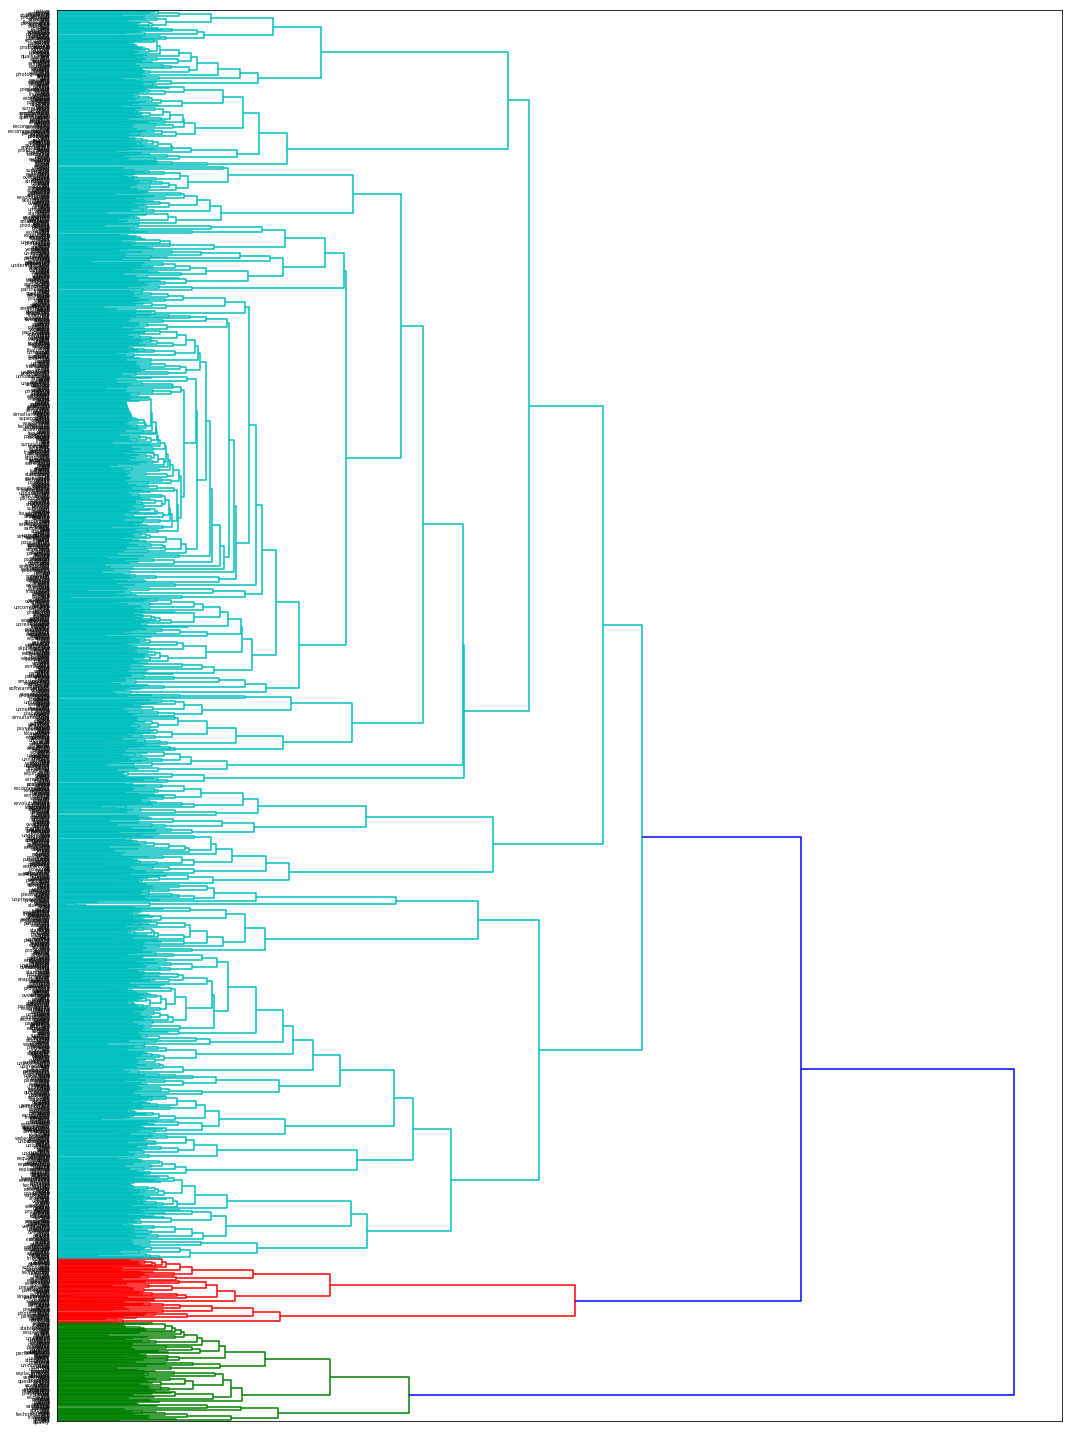

In [26]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=vectorizer.get_feature_names())

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.pdf', dpi=500) #save figure as ward_clusters

### The graph shows that maybe 3 clusters is a better choice. In the lower cell, I left codes to truncade the graph means show only the last defined points. For example the code below will show only 50 last points.

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, truncate_mode='lastp', p=50, orientation="right", labels=vectorizer.get_feature_names())

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters_tr.pdf', dpi=500) #save figure as ward_clusters